In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np 
from Electromagnetics.graphene import *
from scipy import constants

from Electromagnetics.MaxwellEigState2D import *
from Electromagnetics.Misc import *
import math

del_graph = 50.0*constants.nano
width_graph = 20.0*constants.micro
W_x = 6.0*width_graph
W_y = 4.0*width_graph


fs_name = 'freespace'
fs_rect = [Point2D(0.0, 0.0), Point2D(W_x, W_y)]
fs_type = 'all_scalar'
def fs_eps(f):
    return constants.epsilon_0
def fs_mu(f):
    return constants.mu_0
def fs_sig(f):
    return 0.0
fs_params = [fs_eps, fs_mu, fs_sig]
fs_mat = [fs_name, fs_rect, fs_type, fs_params]


P00 = Point2D(W_x/2.0-width_graph/2.0, W_y/2.0-del_graph/2.0)
P11 = Point2D(W_x/2.0+width_graph/2.0, W_y/2.0+del_graph/2.0)
graph_name = 'graphene'
graph_rect = [P00, P11]
graph_type = 'sigma_tensor'
def graph_eps(f):
    return constants.epsilon_0
def graph_mu(f):
    return constants.mu_0

mu_c = 0.3*constants.eV
B_0 = 1.0
tau = 0.2*constants.pico
T = 300.0
def graph_sig(f):
    omega_0 = 2.0*math.pi*f
    sigma_d, sigma_o = condKuboLorentzian(mu_c, B_0, tau, np.array([omega_0]), T)
    sig_d, sig_o = sigma_d[0]/del_graph, sigma_o[0]/del_graph
    sig = [[sig_d , 0.0  ,  sig_o],
           [0.0   , 0.0,  0.0  ],
           [-sig_o, 0.0  ,  sig_d]]
    return sig
graph_params = [graph_eps, graph_mu, graph_sig]
graph_mat = [graph_name, graph_rect, graph_type, graph_params]


w_edge_mode = 5.0*constants.micro
P00 = Point2D(W_x/2.0-width_graph/2.0-w_edge_mode, W_y/2.0-w_edge_mode)
P11 = Point2D(W_x/2.0-width_graph/2.0+w_edge_mode, W_y/2.0+w_edge_mode)
rect_edge_l = [P00, P11]
P00 = Point2D(W_x/2.0+width_graph/2.0-w_edge_mode, W_y/2.0-w_edge_mode)
P11 = Point2D(W_x/2.0+width_graph/2.0+w_edge_mode, W_y/2.0+w_edge_mode)
rect_edge_r = [P00, P11]
w_bulk_mode = 10.0*constants.micro
P00 = Point2D(W_x/2.0-width_graph/2.0-w_bulk_mode, W_y/2.0-w_bulk_mode)
P11 = Point2D(W_x/2.0+width_graph/2.0+w_bulk_mode, W_y/2.0+w_bulk_mode)
rect_bulk = [P00, P11]
mesh_params = [[rect_bulk, 3], [rect_edge_l, 2], [rect_edge_r, 2]] 


maxwell2Dsolver = MaxEigState2DSolver([fs_mat, graph_mat], mesh_params, vb=True)


possible material types :  dict_keys(['sigma_tensor', 'all_scalar'])
material name:  freespace    type : all_scalar
material name:  graphene    type : sigma_tensor
-------------------- all scalar material --------------------


[autoreload of Electromagnetics.MaxwellEigState2D failed: Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 229, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


normalizing to k_0


scalar epsilon mu sigma equations: 


disintegrating equations


-------------------- Sigma tensor material --------------------


normalizing to k_0


scalar epsilon mu sigma equations: 


disintegrating equations


refining mesh
Number of cells to refine:  15
Number of cells to refine:  58
Number of cells to refine:  226
Number of cells to refine:  108
Number of cells to refine:  402
Number of cells to refine:  108
Number of cells to refine:  396
refining materials
cecking nodes inside
Number of cells to refine:  76
cecking nodes inside
Number of cells to refine:  156
cecking nodes inside
Number of cells to refine:  308
cecking nodes inside
Number of cells to refine:  612
cecking nodes inside
Number of cells to refine:  276
cecking nodes inside
Number of cells to refine:  388
cecking nodes inside
refining border of graphene
Number of cells to refine:  3700
Number of cells to refine:  5656
Number of cells to refine:  11320
n_cells :  71536  n_sides:  157399  n_nodes:  85864


In [4]:
freq_0 = 7.0*constants.tera
freq_1 = 1.0*constants.tera

freq = freq_0 #2.45*constants.tera

from Electromagnetics.graphene import *

omega_0 = 2.0*math.pi*freq
kz_k0_inf = magnetoplasmonDispersion_normalized(mu_c, B_0, np.array([omega_0]), tau, T, cond='Kubo')

n_modes = 5
lambda_0 = kz_k0_inf[0][0] + 5.0
k_eigs, k_vecs = maxwell2Dsolver.Solve(freq, n_modes, lambda_0, tol=1.0e-4, firstPass=True)

print(k_eigs)
print(k_vecs.shape)

print('infinite magnetoplasmon dispersion graphene: \n', kz_k0_inf)


Eq1 boundary equations 


[[(1837.9852403688872-15902.977007446063j), 0.0, (-1174.3608973756297-273.01111659737995j)], [0.0, 0.0, 0.0], [(1174.3608973756297+273.01111659737995j), 0.0, (1837.9852403688872-15902.977007446063j)]]


Eq1 boundary equations 


rg.CellsToIndexTotalShared:  1
rg.SidesToIndexTotalShared:  30145
rg.NodesToIndexTotalShared:  15073
initial matrix nnz 1843027 0:00:08
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:02
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2937654
solving eigenvalues 0:03:08
[ 9.02641986-1.02658503j  8.02320732-1.00381776j  6.59567021-0.78791362j
  6.27378802-0.83870303j  5.72267444-0.93216942j]
(359926, 5)
[ 9.02641986-1.02658503j  8.02320732-1.00381776j  6.59567021-0.78791362j
  6.27378802-0.83870303j  5.72267444-0.93216942j]
(359926, 5)
infinite magnetoplasmon dispersion graphene: 
 [array([ 6.66379808-0.75268401j]), array([ 1.01100742+0.00256274j])]


In [57]:
ex, ey = maxwell2Dsolver.GetEtInCellsFromFinalSolutionVector(k_vecs[:, 0], maxwell2Dsolver.A_coo_final)

exy_max = GetMaxComplexVec2D(ex, ey)

ex_prev = ex
ey_prev = ey


GetFromSolutionIndexToInitialIndex :  0:00:02
InterpolateVariablesValuesToCellCenters :  0:00:00
CalculateSurfaceIntegral :  0:00:00


In [58]:
%reload_ext autoreload
%autoreload


from Electromagnetics.RecGrid2D import *
import queue

que = queue.Queue()
print("queue started..")
window = GUIMaker2D(wx=3.0, wy=6.0, wxp=600, wyp=400, que=que)
    
print('window started...')

window.AttachGrid(maxwell2Dsolver.rg)
que.put(["updategrid"])
que.put(["toggleTestMode"])

queue started..
window started...


In [59]:
%reload_ext autoreload
%autoreload

import numpy as np
from Electromagnetics.Misc import *

colors = GetColorMap(NormalizeArrayTo0n1(exy_max, logscale=True, logrange=3.0))
que.put(["ColorCells", colors])

In [ ]:
[cells_nm, nodes_nm, sidesX_nm, sidesY_nm] = maxwell2Dsolver.GetCellsNodesAndSidesForMaterial('graphene')

que.put(["MarkGridSides", sidesX_nm, "yellow"])
que.put(["MarkGridSides", sidesY_nm, "yellow"])


In [ ]:
import time
for i in range(n_modes):
    ex, ey = maxwell2Dsolver.GetEtInCellsFromFinalSolutionVector(k_vecs[:, i], maxwell2Dsolver.A_coo_final)
    
    exy_max = GetMaxComplexVec2D(ex, ey)
    colors = GetColorMap(NormalizeArrayTo0n1(exy_max, logscale=True, logrange=3.0))
    que.put(["ColorCells", colors])
    que.put(["logtext", 'mode: '+str(i)])
    time.sleep(5)


In [5]:
%reload_ext autoreload
%autoreload

maxwell2Dsolver.vbose = True
ind_mode = 2
k_init, k_vec_init = k_eigs[ind_mode], k_vecs[:, ind_mode]
n_freq = 30
f_step = (freq_1 - freq_0)/n_freq
#[freq_sweep, x_null_sweep] = maxwell2Dsolver.sweepFrequency(k_init, k_vec_init, freq_0, freq_1, f_step, n_eig=3, stop_cond='Re(k)<1.01')


file_sim = './other/datafiles/graphene_plasmons/fdfd_magnetoplasmon_sim'
file_sim_start = None #'./other/datafiles/graphene_plasmons/fdfd_magnetoplasmon_sim_1'
k_init, k_vec_init = k_eigs[0:5], [k_vecs[:, 0], k_vecs[:, 1], k_vecs[:, 2], k_vecs[:, 3], k_vecs[:, 4]]
[freq_sweep, x_null_sweep] = maxwell2Dsolver.sweepFrequencyMultiple(k_init, k_vec_init, freq_0, freq_1, f_step, n_eig=6, tol=1.0e-4,
                                        interp_ord=4, stop_cond='Re(k)<1.01', saveToFile=file_sim, readFromFile=file_sim_start)



X :  [7000000000000.0]
Y :  [[(9.0264198593920089-1.0265850275942863j)]]
X :  [7000000000000.0]
Y :  [[(8.0232073158584836-1.0038177634322727j)]]
X :  [7000000000000.0]
Y :  [[(6.5956702117118349-0.78791361784606873j)]]
X :  [7000000000000.0]
Y :  [[(6.2737880213737869-0.83870302667178354j)]]
X :  [7000000000000.0]
Y :  [[(5.722674439701902-0.93216942168447792j)]]
frequency: 6950000000000.0   k_init: (9.02641985939-1.02658502759j)


Eq1 boundary equations 


[[(1864.5668056848933-16016.187894140845j), 0.0, (-1190.7901300086533-278.88836148783594j)], [0.0, 0.0, 0.0], [(1190.7901300086533+278.88836148783594j), 0.0, (1864.5668056848933-16016.187894140845j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:08
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:02
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939013
solving eigenvalues 0:03:05
[ 8.95915095-1.02484281j  7.95803180-1.00216507j  6.54355302-0.78802249j
  6.21302983-0.84076828j  5.64642626-0.93829748j  4.79140447-1.11966008j]
(359926, 6)
0 0 x_correlation:  (-0.696724368036-0.717114729036j)     abs(x_correlation):  0.999839176876
k_correlation_r:  0.00745244641392     k_correlation_i:  0.00169709593051
0 1 x_correlation:  (1.01782193515e-05+2.47104124638e-06j)     abs(x_correlation):  1.04738815158e-05
k_correlation_r:  0.104467894172     k_correlation_i:  0.0205153908439
0 2 x_correlation:  (-0.108146283643+0.046155163058j)     abs(x_correlation):  0.117583662737
k_correlation_r:  0.263806330622     k_correlation_i:  0.231185888377
0 3 x_correlation:  (0.133255242892+0.149393904846j)  

Eq1 boundary equations 


[[(1919.4960594516813-16247.432796871975j), 0.0, (-1224.6824779896813-291.15794866568325j)], [0.0, 0.0, 0.0], [(1224.6824779896813+291.15794866568325j), 0.0, (1919.4960594516813-16247.432796871975j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:09
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946219
solving eigenvalues 0:03:35
[ 8.82505545-1.02138733j  7.82809331-0.99888371j  6.43913209-0.78834761j
  6.09035113-0.84530658j  5.49086453-0.95174728j  4.57988859-1.15613081j]
(359926, 6)
0 0 x_correlation:  (-0.938525679758-0.343373828084j)     abs(x_correlation):  0.999367818862
k_correlation_r:  0.0149674343583     k_correlation_i:  0.00337172459816
0 1 x_correlation:  (-1.29940541373e-05-1.43141996694e-06j)     abs(x_correlation):  1.30726587213e-05
k_correlation_r:  0.0982456878922     k_correlation_i:  0.0188197547016
0 2 x_correlation:  (0.120115768115-0.00143660053686j)     abs(x_correlation):  0.120124358774
k_correlation_r:  0.258525562222     k_correlation_i:  0.228478295832
0 3 x_correlation:  (0.185994420978-0.0822311099017j

Eq1 boundary equations 


[[(2036.922472458665-16730.192818852556j), 0.0, (-1296.8769094096897-317.93896725913288j)], [0.0, 0.0, 0.0], [(1296.8769094096897+317.93896725913288j), 0.0, (2036.922472458665-16730.192818852556j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947973
solving eigenvalues 0:04:07
[ 8.55859642-1.01458632j  7.56983738-0.9924101j   6.22938113-0.78948612j
  5.83970970-0.8562628j   5.16578224-0.98437392j  4.12515977-1.2507169j ]
(359926, 6)
0 0 x_correlation:  (-0.994668145777-0.0765069248433j)     abs(x_correlation):  0.997606149626
k_correlation_r:  0.000202367823655     k_correlation_i:  0.00010839214347
0 1 x_correlation:  (5.29858389069e-06+1.95924246734e-05j)     abs(x_correlation):  2.02962581731e-05
k_correlation_r:  0.115717582229     k_correlation_i:  0.0219452146634
0 2 x_correlation:  (0.0917736817768-0.0852545251543j)     abs(x_correlation):  0.12526269487
k_correlation_r:  0.272042994173     k_correlation_i:  0.222345276114
0 3 x_correlation:  (0.202538978925-0.0537906397319j

Eq1 boundary equations 


[[(2165.5025597249655-17241.992436648587j), 0.0, (-1375.5247790405306-348.09929450825592j)], [0.0, 0.0, 0.0], [(1375.5247790405306+348.09929450825592j), 0.0, (2165.5025597249655-17241.992436648587j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:11
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2930820
solving eigenvalues 0:03:14
[ 8.29438346-1.00792453j  7.31369321-0.98604444j  6.01805796-0.79141025j
  5.58061970-0.87030921j  4.81824128-1.02714129j  3.61998167-1.38977331j]
(359926, 6)
0 0 x_correlation:  (-0.931176727867+0.358071957758j)     abs(x_correlation):  0.997650051599
k_correlation_r:  7.62631669208e-06     k_correlation_i:  7.35985956948e-06
0 1 x_correlation:  (1.57950812283e-05-4.40663505029e-05j)     abs(x_correlation):  4.68116207544e-05
k_correlation_r:  0.118229476463     k_correlation_i:  0.0216973185837
0 2 x_correlation:  (-0.0116395443561-0.13777272573j)     abs(x_correlation):  0.138263527179
k_correlation_r:  0.274398382451     k_correlation_i:  0.214945515288
0 3 x_correlation:  (-0.00207092192253-0.22553427257

Eq1 boundary equations 


[[(2306.6946005557379-17785.501889910229j), 0.0, (-1461.4034176469024-382.18662451945056j)], [0.0, 0.0, 0.0], [(1461.4034176469024+382.18662451945056j), 0.0, (2306.6946005557379-17785.501889910229j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:19
initial matrix shared nnz 2219743 0:00:14
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946528
solving eigenvalues 0:03:13
[ 8.03235009-1.00139555j  7.05960850-0.97977554j  5.80463455-0.79432854j
  5.31100091-0.88837922j  4.44237149-1.08461599j  3.05842774-1.60625895j]
(359926, 6)
0 0 x_correlation:  (0.873219311074+0.48258305274j)     abs(x_correlation):  0.997696531027
k_correlation_r:  8.27308204799e-06     k_correlation_i:  6.39454608774e-06
0 1 x_correlation:  (6.52483395823e-05+8.12463349273e-05j)     abs(x_correlation):  0.000104203228152
k_correlation_r:  0.121096475565     k_correlation_i:  0.0215787133548
0 2 x_correlation:  (0.0906509607049-0.1230627951j)     abs(x_correlation):  0.152846485778
k_correlation_r:  0.277277196886     k_correlation_i:  0.206986711314
0 3 x_correlation:  (-0.117736710914+0.2118143155j)     

Eq1 boundary equations 


[[(2462.2034029470815-18363.722726447417j), 0.0, (-1555.4077139823598-420.85844448033095j)], [0.0, 0.0, 0.0], [(1555.4077139823598+420.85844448033095j), 0.0, (2462.2034029470815-18363.722726447417j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:14
final matrix (application of boundary conditions) nnz:  2219267 0:00:06
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2938082
solving eigenvalues 0:04:52
[ 7.77243696-0.99499398j  6.80753713-0.97359285j  5.58844134-0.79852241j
  5.02818279-0.9117954j   4.03052991-1.16451574j  2.45988999-1.95571913j]
(359926, 6)
0 0 x_correlation:  (-0.92841243924-0.365446513225j)     abs(x_correlation):  0.997747869636
k_correlation_r:  7.63933648593e-06     k_correlation_i:  5.42706478053e-06
0 1 x_correlation:  (9.83792903625e-05+0.000200325981268j)     abs(x_correlation):  0.000223179263247
k_correlation_r:  0.124137862003     k_correlation_i:  0.0214981925083
0 2 x_correlation:  (0.0634433108159+0.156817390134j)     abs(x_correlation):  0.169164853134
k_correlation_r:  0.280906242294     k_correlation_i:  0.19774289381
0 3 x_correlation:  (0.0724940750939+0.249484869955j) 

Eq1 boundary equations 


[[(2634.0319024086903-18980.039381316852j), 0.0, (-1658.571320064169-464.90840475434885j)], [0.0, 0.0, 0.0], [(1658.571320064169+464.90840475434885j), 0.0, (2634.0319024086903-18980.039381316852j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:09
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947746
solving eigenvalues 0:03:10
[ 7.51458963-0.98871677j  6.55743733-0.96748717j  5.36861920-0.80437523j
  4.72869567-0.94249855j  3.57331893-1.28072976j  1.91137898-2.47823559j]
(359926, 6)
0 0 x_correlation:  (-0.955140041625-0.28865066172j)     abs(x_correlation):  0.997803439374
k_correlation_r:  7.24168234347e-06     k_correlation_i:  3.08656979715e-06
0 1 x_correlation:  (0.000419497639973+0.000188003900359j)     abs(x_correlation):  0.000459699615502
k_correlation_r:  0.127366972992     k_correlation_i:  0.0214625833478
0 2 x_correlation:  (-0.163885893771-0.090790194635j)     abs(x_correlation):  0.187353797984
k_correlation_r:  0.285459541913     k_correlation_i:  0.186832996963
0 3 x_correlation:  (-0.226792909548+0.160372942909j)

Eq1 boundary equations 


[[(2824.5458139416046-19638.280302318064j), 0.0, (-1772.0922144291003-515.30016173332899j)], [0.0, 0.0, 0.0], [(1772.0922144291003+515.30016173332899j), 0.0, (2824.5458139416046-19638.280302318064j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:08
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939134
solving eigenvalues 0:05:07
[ 7.25876317-0.98256239j  6.30927482-0.96145117j  5.14405096-0.81241608j
  4.40797447-0.98345433j  3.06225580-1.45953349j  1.50994170-3.106897j  ]
(359926, 6)
0 0 x_correlation:  (-0.511642771885+0.856695125988j)     abs(x_correlation):  0.997850121468
k_correlation_r:  6.19201084271e-06     k_correlation_i:  1.55350711284e-06
0 1 x_correlation:  (-0.000770631892332-0.000496388761164j)     abs(x_correlation):  0.000916665323708
k_correlation_r:  0.130801078981     k_correlation_i:  0.0214784206828
0 2 x_correlation:  (0.0689890475806-0.195710835158j)     abs(x_correlation):  0.207514384283
k_correlation_r:  0.291178395726     k_correlation_i:  0.173704374065
0 3 x_correlation:  (-0.0647885242702-0.28881912446

frequency: 5450000000000.0   k_init: (7.00495756234-0.976530835263j)


Eq1 boundary equations 


[[(3036.5552228830029-20342.790592051788j), 0.0, (-1897.3635723879604-573.21113666975793j)], [0.0, 0.0, 0.0], [(1897.3635723879604+573.21113666975793j), 0.0, (3036.5552228830029-20342.790592051788j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946546
solving eigenvalues 0:05:29
[ 7.00491759 -9.76521303e-01j  6.06302185 -9.55473782e-01j
  4.91326838 -8.23381175e-01j  4.05998054 -1.03944323e+00j
  2.50398249 -1.74841928e+00j  0.97388045 +2.87193900e-04j]
(359926, 6)
0 0 x_correlation:  (-0.775055781548+0.628544233681j)     abs(x_correlation):  0.997887427621
k_correlation_r:  5.7057498951e-06     k_correlation_i:  9.76124496225e-06
0 1 x_correlation:  (0.00150742975299-0.00091360512713j)     abs(x_correlation):  0.00176267376122
k_correlation_r:  0.134458114803     k_correlation_i:  0.0215422376454
0 2 x_correlation:  (0.0842698636916-0.213699706623j)     abs(x_correlation):  0.229714985444
k_correlation_r:  0.298387660973     k_correlation_i:  0.157576028753
0 3 x_correlation:  (0.25

frequency: 5250000000000.0   k_init: (6.75305291506-0.970593518303j)


Eq1 boundary equations 


[[(3273.4183465679366-21098.518551818714j), 0.0, (-2036.01108293365-640.08954824910643j)], [0.0, 0.0, 0.0], [(2036.01108293365+640.08954824910643j), 0.0, (3273.4183465679366-21098.518551818714j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:09
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946684
solving eigenvalues 0:05:15
[ 6.75300931 -9.70584048e-01j  5.81865174 -9.49546810e-01j
  4.67431760 -8.38314898e-01j  3.67677703 -1.11864285e+00j
  1.95897285 -2.20062764e+00j  0.97118148 +7.88294294e-04j]
(359926, 6)
0 0 x_correlation:  (-0.784163027451-0.617214948538j)     abs(x_correlation):  0.997930832432
k_correlation_r:  6.45721525631e-06     k_correlation_i:  9.75760386847e-06
0 1 x_correlation:  (-0.00110633164446-0.00307954209149j)     abs(x_correlation):  0.00327223917231
k_correlation_r:  0.138357704278     k_correlation_i:  0.0216663718289
0 2 x_correlation:  (-0.167035931199-0.191201112137j)     abs(x_correlation):  0.253887509724
k_correlation_r:  0.307527763307     k_correlation_i:  0.137353920775
0 3 x_correlation:  (-0

frequency: 5050000000000.0   k_init: (6.50303831182-0.964750620411j)


Eq1 boundary equations 


[[(3539.1745742641906-21911.118986644073j), 0.0, (-2189.9380509246557-717.72937404805214j)], [0.0, 0.0, 0.0], [(2189.9380509246557+717.72937404805214j), 0.0, (3539.1745742641906-21911.118986644073j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:10
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947908
solving eigenvalues 0:05:33
[ 6.50299866 -9.64744073e-01j  5.57614317 -9.43676087e-01j
  4.42456477 -8.58715314e-01j  3.24866632 -1.23599960e+00j
  1.53263269 -2.78926634e+00j  0.96898371 -5.98446364e-04j]
(359926, 6)
0 0 x_correlation:  (0.374202294826-0.925167279691j)     abs(x_correlation):  0.997978883977
k_correlation_r:  6.09684017511e-06     k_correlation_i:  6.78613727901e-06
0 1 x_correlation:  (0.000711583337567+0.00582283731258j)     abs(x_correlation):  0.00586615591466
k_correlation_r:  0.142524124058     k_correlation_i:  0.0218439534403
0 2 x_correlation:  (-0.181594504892+0.212935288544j)     abs(x_correlation):  0.279853535468
k_correlation_r:  0.319206593391     k_correlation_i:  0.111456323837
0 3 x_correlation:  (0.0

frequency: 4850000000000.0   k_init: (6.25488565788-0.959001380639j)


Eq1 boundary equations 


[[(3838.7165273956539-22787.076643173816j), 0.0, (-2361.3797994302868-808.36975029597659j)], [0.0, 0.0, 0.0], [(2361.3797994302868+808.36975029597659j), 0.0, (3838.7165273956539-22787.076643173816j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:11
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947997
solving eigenvalues 0:06:21
[ 6.25484974 -9.58993032e-01j  5.33547943 -9.37898195e-01j
  4.16043392 -8.86795354e-01j  2.76757109 -1.42019673e+00j
  0.96653094 +2.66207710e-06j  0.91857542 -1.85798281e-03j]
(359926, 6)
0 0 x_correlation:  (-0.813785608313+0.577764406677j)     abs(x_correlation):  0.998027417419
k_correlation_r:  5.74202711134e-06     k_correlation_i:  8.70514577773e-06
0 1 x_correlation:  (-0.00250562730091-0.00983837213369j)     abs(x_correlation):  0.0101524250508
k_correlation_r:  0.146982523518     k_correlation_i:  0.0220350077949
0 2 x_correlation:  (-0.204561920069-0.229368794845j)     abs(x_correlation):  0.307336335617
k_correlation_r:  0.334274991926     k_correlation_i:  0.0775924393753
0 3 x_correlation:  (-0

Eq1 boundary equations 


[[(4178.0146065221452-23733.853651120095j), 0.0, (-2552.9689772905399-914.82798264706014j)], [0.0, 0.0, 0.0], [(2552.9689772905399+914.82798264706014j), 0.0, (4178.0146065221452-23733.853651120095j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:08
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939090
solving eigenvalues 0:04:49
[ 6.00852765 -9.53320202e-01j  5.09663473 -9.32318091e-01j
  3.87703742 -9.25939693e-01j  2.24458429 -1.72252364e+00j
  0.96428450 +1.14147551e-03j]
(359926, 5)
0 0 x_correlation:  (-0.77534822925-0.628482519266j)     abs(x_correlation):  0.998075725396
k_correlation_r:  5.80820115559e-06     k_correlation_i:  1.12469935031e-05
0 1 x_correlation:  (0.0151482662924-0.00764481329461j)     abs(x_correlation):  0.0169680034764
k_correlation_r:  0.151762159375     k_correlation_i:  0.0221405867319
0 2 x_correlation:  (0.0651841027549+0.329501785534j)     abs(x_correlation):  0.335887472112
k_correlation_r:  0.353930735087     k_correlation_i:  0.0322716191299
0 3 x_correlation:  (0.241755351158+0.294146053087j)   

frequency: 4450000000000.0   k_init: (5.76403237287-0.947725583096j)


Eq1 boundary equations 


[[(4564.41277648919-24760.06523392805j), 0.0, (-2767.8132780994906-1040.6791721955587j)], [0.0, 0.0, 0.0], [(2767.8132780994906+1040.6791721955587j), 0.0, (4564.41277648919-24760.06523392805j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:08
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939132
solving eigenvalues 0:04:56
[ 5.76399867 -9.47711482e-01j  4.85953672 -9.27173646e-01j
  3.56771486 -9.81600652e-01j  1.75259483 -2.19169023e+00j
  0.96034507 +4.39617133e-04j]
(359926, 5)
0 0 x_correlation:  (0.964663934366-0.256267601581j)     abs(x_correlation):  0.998123033441
k_correlation_r:  5.84685386702e-06     k_correlation_i:  1.4878493993e-05
0 1 x_correlation:  (-0.017327750033-0.0212149882364j)     abs(x_correlation):  0.0273920909585
k_correlation_r:  0.156903159669     k_correlation_i:  0.0219219744629
0 2 x_correlation:  (0.299158057148-0.209142475247j)     abs(x_correlation):  0.365015229969
k_correlation_r:  0.379879231044     k_correlation_i:  0.0291316883708
0 3 x_correlation:  (0.390924493654-0.0470006061315j)     

frequency: 4250000000000.0   k_init: (5.5212628209-0.9421668727j)


Eq1 boundary equations 


[[(5007.0218855124394-25875.688171727121j), 0.0, (-3009.5866969853382-1190.5009990944009j)], [0.0, 0.0, 0.0], [(3009.5866969853382+1190.5009990944009j), 0.0, (5007.0218855124394-25875.688171727121j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:14
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2937624
solving eigenvalues 0:04:43
[ 5.52123100 -9.42143300e-01j  4.62397982 -9.22926848e-01j
  3.22359275 -1.06323983e+00j  1.39477651 -2.77949595e+00j
  0.95530788 +1.23496707e-03j]
(359926, 5)
0 0 x_correlation:  (-0.837700335138+0.542768358675j)     abs(x_correlation):  0.99816799321
k_correlation_r:  5.76298423311e-06     k_correlation_i:  2.50194113476e-05
0 1 x_correlation:  (0.0356808758775-0.0234473295205j)     abs(x_correlation):  0.0426954583654
k_correlation_r:  0.162472030169     k_correlation_i:  0.0208868870355
0 2 x_correlation:  (-0.378942748468+0.108239495168j)     abs(x_correlation):  0.394098204678
k_correlation_r:  0.414538855978     k_correlation_i:  0.105937785955
0 3 x_correlation:  (-0.393259414808+0.0915034309907j)   

frequency: 4050000000000.0   k_init: (5.28022463677-0.936615655882j)


Eq1 boundary equations 


[[(5517.2479812462325-27092.306668923204j), 0.0, (-3282.6348823439939-1370.2105600206137j)], [0.0, 0.0, 0.0], [(3282.6348823439939+1370.2105600206137j), 0.0, (5517.2479812462325-27092.306668923204j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939381
solving eigenvalues 0:05:01
[ 5.28019719 -9.36570631e-01j  4.38946830 -9.20372441e-01j
  2.83418795 -1.18851738e+00j  0.95165009 +5.04547582e-06j
  0.87499482 -5.20426994e-03j]
(359926, 5)
0 0 x_correlation:  (-0.241259026695-0.968615572427j)     abs(x_correlation):  0.998209419466
k_correlation_r:  5.1972892317e-06     k_correlation_i:  4.80720464978e-05
0 1 x_correlation:  (0.0640235047693-0.00536320858864j)     abs(x_correlation):  0.0642477483599
k_correlation_r:  0.168598468899     k_correlation_i:  0.0181437836104
0 2 x_correlation:  (0.324908430334-0.270459147852j)     abs(x_correlation):  0.42274535924
k_correlation_r:  0.461256655103     k_correlation_i:  0.200098348749
0 3 x_correlation:  (0.225385287855+0.342908439267j)     a

frequency: 3850000000000.0   k_init: (5.0408972473-0.930993474201j)


Eq1 boundary equations 


[[(6109.5116088852292-28423.40021339048j), 0.0, (-3592.0941681385834-1587.5345727222032j)], [0.0, 0.0, 0.0], [(3592.0941681385834+1587.5345727222032j), 0.0, (6109.5116088852292-28423.40021339048j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:15
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947718
solving eigenvalues 0:04:19
[ 5.04088775 -9.30901827e-01j  4.15498084 -9.20757379e-01j
  2.39335635 -1.39186297e+00j  0.94607432 -6.12762341e-04j]
(359926, 4)
0 0 x_correlation:  (0.407344161882-0.911350150503j)     abs(x_correlation):  0.998242637359
k_correlation_r:  1.8848617169e-06     k_correlation_i:  9.84402070937e-05
0 1 x_correlation:  (-0.0842152701123-0.0402656496716j)     abs(x_correlation):  0.0933463136046
k_correlation_r:  0.175541613223     k_correlation_i:  0.0122369525537
0 2 x_correlation:  (-0.402925858129+0.201780707669j)     abs(x_correlation):  0.450627008885
k_correlation_r:  0.523992482994     k_correlation_i:  0.314219109215
1 0 x_correlation:  (-0.103851870772-0.0844606827185j)     abs(x_correlation):  0.13386

Eq1 boundary equations 


[[(6802.2470817436424-29884.671689305018j), 0.0, (-3944.0168145429107-1852.6810484537186j)], [0.0, 0.0, 0.0], [(3944.0168145429107+1852.6810484537186j), 0.0, (6802.2470817436424-29884.671689305018j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:09
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947492
solving eigenvalues 0:04:05
[ 4.80334781 -9.24952732e-01j  3.91864836 -9.25931175e-01j
  1.92599981 -1.72938203e+00j  0.94005035 -1.54190866e-04j]
(359926, 4)
0 0 x_correlation:  (-0.932168787081+0.357186712611j)     abs(x_correlation):  0.998258982065
k_correlation_r:  9.39995559383e-06     k_correlation_i:  0.000199058833689
0 1 x_correlation:  (-0.0902979441325-0.0948213513265j)     abs(x_correlation):  0.130938181528
k_correlation_r:  0.183794807925     k_correlation_i:  0.00094174462105
0 2 x_correlation:  (0.160868436096+0.449284978134j)     abs(x_correlation):  0.477216560179
k_correlation_r:  0.604213974644     k_correlation_i:  0.447220652675
1 0 x_correlation:  (0.111625940361+0.146731881477j)     abs(x_correlation):  0.184365

Eq1 boundary equations 


[[(7619.3138031247863-31494.385237782441j), 0.0, (-4345.4666393390908-2179.3150447499588j)], [0.0, 0.0, 0.0], [(4345.4666393390908+2179.3150447499588j), 0.0, (7619.3138031247863-31494.385237782441j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:11
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2937830
solving eigenvalues 0:03:45
[ 4.56776845 -9.18381978e-01j  3.67731294 -9.38595500e-01j
  1.52449797 -2.22497268e+00j  0.93270361 -1.42293700e-04j]
(359926, 4)
0 0 x_correlation:  (-0.823933884893+0.563581491467j)     abs(x_correlation):  0.998244030385
k_correlation_r:  4.18295277845e-05     k_correlation_i:  0.000371567514033
0 1 x_correlation:  (-0.0778643580578-0.159116806148j)     abs(x_correlation):  0.177146877631
k_correlation_r:  0.194251874798     k_correlation_i:  0.0187113635528
0 2 x_correlation:  (-0.501931304497-0.000915237070984j)     abs(x_correlation):  0.501932138932
k_correlation_r:  0.686473088896     k_correlation_i:  0.582757446184
1 0 x_correlation:  (-0.19423666055+0.149771053281j)     abs(x_correlation):  0.2452

Eq1 boundary equations 


[[(8591.9851931950852-33273.646304989568j), 0.0, (-4804.5127090872838-2585.9641305418872j)], [0.0, 0.0, 0.0], [(4804.5127090872838+2585.9641305418872j), 0.0, (8591.9851931950852-33273.646304989568j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:12
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2936622
solving eigenvalues 0:04:03
[ 4.33467501 -9.10636469e-01j  3.42586474 -9.62757109e-01j
  1.25799088 -2.79644859e+00j  0.92380252 +5.70638682e-06j]
(359926, 4)
0 0 x_correlation:  (0.936999763316-0.344078315167j)     abs(x_correlation):  0.998177561069
k_correlation_r:  0.000121193388084     k_correlation_i:  0.000607004607016
0 1 x_correlation:  (0.208932904739-0.0978615865444j)     abs(x_correlation):  0.230715948308
k_correlation_r:  0.20848170195     k_correlation_i:  0.0501839548528
0 2 x_correlation:  (0.262362361912-0.453131269599j)     abs(x_correlation):  0.523604771213
k_correlation_r:  0.725734722358     k_correlation_i:  0.683656838342
1 0 x_correlation:  (-0.0812781862617+0.303432219579j)     abs(x_correlation):  0.314129360

frequency: 3050000000000.0   k_init: (4.10406747425-0.901716205146j)


Eq1 boundary equations 


[[(9761.7645254452727-35246.538467338811j), 0.0, (-5330.02955614231-3098.0455036043381j)], [0.0, 0.0, 0.0], [(5330.02955614231+3098.0455036043381j), 0.0, (9761.7645254452727-35246.538467338811j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:10
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939085
solving eigenvalues 0:04:34
[ 4.10522772 -9.01010409e-01j  3.15620871 -1.00453662e+00j
  0.91300145 -5.84979154e-07j  0.75615267 -1.86472767e-02j]
(359926, 4)
0 0 x_correlation:  (-0.967371453375-0.245521732097j)     abs(x_correlation):  0.998042308591
k_correlation_r:  0.000282626270405     k_correlation_i:  0.000782724871057
0 1 x_correlation:  (0.13962938337+0.25215170114j)     abs(x_correlation):  0.28823054156
k_correlation_r:  0.229201407676     k_correlation_i:  0.0975601293638
0 2 x_correlation:  (-0.530280787005-0.111179461992j)     abs(x_correlation):  0.5418104704
k_correlation_r:  0.725599017399     k_correlation_i:  0.738368123259
1 0 x_correlation:  (0.380874950566-0.0582039989252j)     abs(x_correlation):  0.385296552618


frequency: 2850000000000.0   k_init: (3.87942659054-0.889503798806j)


Eq1 boundary equations 


[[(11184.473958901021-37439.91567329986j), 0.0, (-5931.1001377822877-3750.8732997773327j)], [0.0, 0.0, 0.0], [(5931.1001377822877+3750.8732997773327j), 0.0, (11184.473958901021-37439.91567329986j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:09
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2945211
solving eigenvalues 0:03:41
[ 3.88149586 -8.88996911e-01j  2.85581660 -1.07380463e+00j
  0.89964517 +9.36937371e-06j]
(359926, 3)
0 0 x_correlation:  (0.819132789714-0.569845148698j)     abs(x_correlation):  0.997848696286
k_correlation_r:  0.000533110700194     k_correlation_i:  0.000569854645974
0 1 x_correlation:  (-0.324641015372+0.113708309465j)     abs(x_correlation):  0.343978732632
k_correlation_r:  0.261020760263     k_correlation_i:  0.164424770764
1 0 x_correlation:  (-0.0878833163482+0.441497933344j)     abs(x_correlation):  0.450159863204
k_correlation_r:  0.26385600226     k_correlation_i:  0.171633483374
1 1 x_correlation:  (0.588998022291-0.80009758422j)     abs(x_correlation):  0.99351638866
k_correlation_r:  0.00436776

Eq1 boundary equations 


[[(12936.283467934594-39882.333750560196j), 0.0, (-6615.5162383199204-4594.1837078293511j)], [0.0, 0.0, 0.0], [(6615.5162383199204+4594.1837078293511j), 0.0, (12936.283467934594-39882.333750560196j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946133
solving eigenvalues 0:03:29
[ 3.66629018 -8.74946328e-01j  2.50635637 -1.18856453e+00j
  0.88289602 +4.54007127e-05j]
(359926, 3)
0 0 x_correlation:  (-0.964969227383+0.253311185901j)     abs(x_correlation):  0.99766335339
k_correlation_r:  0.000766650124909     k_correlation_i:  0.000400429890203
0 1 x_correlation:  (0.360187558782+0.153551433003j)     abs(x_correlation):  0.391552193301
k_correlation_r:  0.311377910227     k_correlation_i:  0.252541115165
1 0 x_correlation:  (0.458877117676-0.198762403544j)     abs(x_correlation):  0.50007469661
k_correlation_r:  0.315853569478     k_correlation_i:  0.264157770288
1 1 x_correlation:  (-0.916557844122-0.383848386642j)     abs(x_correlation):  0.993689018531
k_correlation_r:  0.00726110

Eq1 boundary equations 


[[(15122.576018880782-42601.057400093894j), 0.0, (-7386.3458772180329-5698.8850756193315j)], [0.0, 0.0, 0.0], [(7386.3458772180329+5698.8850756193315j), 0.0, (15122.576018880782-42601.057400093894j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2945330
solving eigenvalues 0:03:28
[ 3.46225671 -8.60472561e-01j  2.08642346 -1.38901672e+00j
  0.86142469 -5.27628525e-05j]
(359926, 3)
0 0 x_correlation:  (0.755649247024-0.651292668265j)     abs(x_correlation):  0.997591060638
k_correlation_r:  0.000764246763088     k_correlation_i:  0.00187559631184
0 1 x_correlation:  (-0.344078022003+0.25304466487j)     abs(x_correlation):  0.427108051487
k_correlation_r:  0.391198229071     k_correlation_i:  0.362053567448
1 0 x_correlation:  (-0.34452308504+0.404172235114j)     abs(x_correlation):  0.531085070175
k_correlation_r:  0.396919583763     k_correlation_i:  0.38167867452
1 1 x_correlation:  (0.776731428993-0.620971930232j)     abs(x_correlation):  0.994443488049
k_correlation_r:  0.0101547946

Eq1 boundary equations 


[[(17890.832937453946-45615.039783419721j), 0.0, (-8234.5422300565169-7166.931835115397j)], [0.0, 0.0, 0.0], [(8234.5422300565169+7166.931835115397j), 0.0, (17890.832937453946-45615.039783419721j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:21
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2939156
solving eigenvalues 0:05:44
[ 3.27086977 -8.47979307e-01j  1.61328932 -1.76469360e+00j
  0.83321147 -9.99649911e-05j]
(359926, 3)
0 0 x_correlation:  (-0.633895648827+0.770432130702j)     abs(x_correlation):  0.997692017418
k_correlation_r:  0.000450744042984     k_correlation_i:  0.00283461877473
0 1 x_correlation:  (0.324347499895-0.313813582811j)     abs(x_correlation):  0.451309500726
k_correlation_r:  0.512050929683     k_correlation_i:  0.49379241725
1 0 x_correlation:  (-0.273053249148+0.471972300779j)     abs(x_correlation):  0.545266842539
k_correlation_r:  0.506548124654     k_correlation_i:  0.520837152184
1 1 x_correlation:  (0.650716318698-0.753129869306j)     abs(x_correlation):  0.995307152321
k_correlation_r:  0.01070573

Eq1 boundary equations 


[[(21448.80913909839-48919.526652149922j), 0.0, (-9123.4180081451832-9145.1556987634594j)], [0.0, 0.0, 0.0], [(9123.4180081451832+9145.1556987634594j), 0.0, (21448.80913909839-48919.526652149922j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:13
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947979
solving eigenvalues 0:03:11
[ 3.09226999 -8.39786048e-01j  1.22718429 -2.34787726e+00j
  0.79473190 +5.62370617e-05j]
(359926, 3)
0 0 x_correlation:  (0.0791403198813+0.994790677608j)     abs(x_correlation):  0.997933706458
k_correlation_r:  4.54754855305e-05     k_correlation_i:  0.00276199191003
0 1 x_correlation:  (-0.034043393283+0.465775373164j)     abs(x_correlation):  0.467017827146
k_correlation_r:  0.648493195397     k_correlation_i:  0.637334682605
1 0 x_correlation:  (-0.467445029267+0.28252385072j)     abs(x_correlation):  0.546190975404
k_correlation_r:  0.603126472089     k_correlation_i:  0.64330905166
1 1 x_correlation:  (-0.935585021887+0.342561293439j)     abs(x_correlation):  0.996327041158
k_correlation_r:  0.1142699

Eq1 boundary equations 


[[(26087.872632408715-52453.433841141697j), 0.0, (-9956.5024358996288-11842.262996284313j)], [0.0, 0.0, 0.0], [(9956.5024358996288+11842.262996284313j), 0.0, (26087.872632408715-52453.433841141697j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2939160
solving eigenvalues 0:06:27
[ 2.92579629 -8.37733281e-01j  0.73997045 -4.50237131e-05j]
(359926, 2)
0 0 x_correlation:  (0.507725818563+0.859471624469j)     abs(x_correlation):  0.998236935854
k_correlation_r:  0.00022589112693     k_correlation_i:  0.00219699579008
1 0 x_correlation:  (-5.73329173596e-05-6.4348826472e-05j)     abs(x_correlation):  8.61848877779e-05
k_correlation_r:  0.747144632182     k_correlation_i:  0.999946136976
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 385000000000

Eq1 boundary equations 


[[(32205.015017037542-56032.74792788957j), 0.0, (-10512.798522379724-15541.496093813903j)], [0.0, 0.0, 0.0], [(10512.798522379724+15541.496093813903j), 0.0, (32205.015017037542-56032.74792788957j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:10
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2946527
solving eigenvalues 0:03:23
[ 2.77058697 -8.43264000e-01j  0.65676739 -1.03159950e-04j]
(359926, 2)
0 0 x_correlation:  (-0.411252394942-0.909915064294j)     abs(x_correlation):  0.998535906502
k_correlation_r:  0.000310927090512     k_correlation_i:  0.00171120061199
1 0 x_correlation:  (1.59546651834e-05-9.41251330431e-05j)     abs(x_correlation):  9.54677537784e-05
k_correlation_r:  0.763023794572     k_correlation_i:  0.999877456194
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000

Eq1 boundary equations 


[[(40296.010092651442-59223.279317256551j), 0.0, (-10324.362620010861-20579.940712102944j)], [0.0, 0.0, 0.0], [(10324.362620010861+20579.940712102944j), 0.0, (40296.010092651442-59223.279317256551j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:04
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2936682
solving eigenvalues 0:03:10
[ 2.62622718 -8.57571769e-01j  0.51353495 -9.04852842e-07j]
(359926, 2)
0 0 x_correlation:  (-0.121706498587+0.991353401426j)     abs(x_correlation):  0.998796294705
k_correlation_r:  0.000157935724444     k_correlation_i:  0.0013917956759
1 0 x_correlation:  (-0.0014548538463-0.000905689907225j)     abs(x_correlation):  0.00171373099468
k_correlation_r:  0.804489935522     k_correlation_i:  0.999998943396
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000

Eq1 boundary equations 


[[(50836.588016026784-61132.702525957968j), 0.0, (-8479.4464544063503-27209.271878011925j)], [0.0, 0.0, 0.0], [(8479.4464544063503+27209.271878011925j), 0.0, (50836.588016026784-61132.702525957968j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2942286
solving eigenvalues 0:05:19
[ 2.49402657-0.88184889j  0.00974064-1.0630723j ]
(359926, 2)
0 0 x_correlation:  (0.915092027896+0.400774405945j)     abs(x_correlation):  0.999006278248
k_correlation_r:  0.00052510919858     k_correlation_i:  0.00135204887641
1 0 x_correlation:  (-0.191153057513-0.328869391868j)     abs(x_correlation):  0.38038739241
k_correlation_r:  0.996092359646     k_correlation_i:  0.171592948476
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.

Eq1 boundary equations 


[[(63871.954652307875-60202.934575390063j), 0.0, (-3439.1075537846841-35155.892020296189j)], [0.0, 0.0, 0.0], [(3439.1075537846841+35155.892020296189j), 0.0, (63871.954652307875-60202.934575390063j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:11
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939702
solving eigenvalues 0:05:33
[  2.37973679e+00-0.91889247j   4.77347900e-04-0.63501461j]
(359926, 2)
0 0 x_correlation:  (0.862169274844-0.504963436063j)     abs(x_correlation):  0.999161613677
k_correlation_r:  0.00241693642207     k_correlation_i:  0.0030439953952
1 0 x_correlation:  (2.07149942443e-05+2.24109382705e-05j)     abs(x_correlation):  3.05182099853e-05
k_correlation_r:  0.999798925488     k_correlation_i:  0.306824776718
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000

Eq1 boundary equations 


[[(21448.80913909839-48919.526652149922j), 0.0, (-9123.4180081451832-9145.1556987634594j)], [0.0, 0.0, 0.0], [(9123.4180081451832+9145.1556987634594j), 0.0, (21448.80913909839-48919.526652149922j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:13
initial matrix shared nnz 2219743 0:00:07
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947979
solving eigenvalues 0:03:56
[ 1.22717719-2.34787518j]
(359926, 1)
0 1 x_correlation:  (0.0896173343559+0.992288410414j)     abs(x_correlation):  0.996327032685
k_correlation_r:  0.1142648713     k_correlation_i:  0.0137486159376
making refinement...
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
making refinement...
frequency: 2150000000000.0   k_init: (1.35677178245-2.01824128494j)


Eq1 boundary equations 


[[(19555.152057829277-47232.908229549168j), 0.0, (-8677.9763315812252-8080.8825931413021j)], [0.0, 0.0, 0.0], [(8677.9763315812252+8080.8825931413021j), 0.0, (19555.152057829277-47232.908229549168j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2938146
solving eigenvalues 0:05:21
[ 1.40101877-2.03782031j]
(359926, 1)
0 1 x_correlation:  (-0.1750712256+0.983540519515j)     abs(x_correlation):  0.999000444225
k_correlation_r:  0.0315820086913     k_correlation_i:  0.00960782795159
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0,

Eq1 boundary equations 


[[(23611.046814037378-50665.30380812868j), 0.0, (-9556.7457772815651-10387.93557355811j)], [0.0, 0.0, 0.0], [(9556.7457772815651+10387.93557355811j), 0.0, (23611.046814037378-50665.30380812868j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:14
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947788
solving eigenvalues 0:02:30
[ 1.08702024-2.67825337j]
(359926, 1)
0 1 x_correlation:  (-0.576788785599+0.813018041792j)     abs(x_correlation):  0.996836816872
k_correlation_r:  0.056990212443     k_correlation_i:  0.0277338052386
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0,

Eq1 boundary equations 


[[(28932.489826773875-54256.64646553788j), 0.0, (-10290.753681105469-13546.082998239039j)], [0.0, 0.0, 0.0], [(10290.753681105469+13546.082998239039j), 0.0, (28932.489826773875-54256.64646553788j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:15
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2937654
solving eigenvalues 0:05:18
[ 0.86679847-3.39118446j]
(359926, 1)
0 1 x_correlation:  (0.670088925026-0.738778352653j)     abs(x_correlation):  0.997402938531
k_correlation_r:  0.0582492936451     k_correlation_i:  0.0154096429921
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0,

Eq1 boundary equations 


[[(9761.7645254452727-35246.538467338811j), 0.0, (-5330.02955614231-3098.0455036043381j)], [0.0, 0.0, 0.0], [(5330.02955614231+3098.0455036043381j), 0.0, (9761.7645254452727-35246.538467338811j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:14
final matrix (application of boundary conditions) nnz:  2219267 0:00:06
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2939085
solving eigenvalues 0:05:53
[ 1.09058355-3.36944368j]
(359926, 1)
0 2 x_correlation:  (-0.91807316663-0.39203938648j)     abs(x_correlation):  0.998275122317
k_correlation_r:  0.0318647639974     k_correlation_i:  0.0215941313602
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0, 

Eq1 boundary equations 


[[(11184.473958901021-37439.91567329986j), 0.0, (-5931.1001377822877-3750.8732997773327j)], [0.0, 0.0, 0.0], [(5931.1001377822877+3750.8732997773327j), 0.0, (11184.473958901021-37439.91567329986j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:09
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2945211
solving eigenvalues 0:03:17
[ 0.97124111-3.93706162j]
(359926, 1)
0 2 x_correlation:  (0.48748553206-0.871565747435j)     abs(x_correlation):  0.998633564462
k_correlation_r:  0.0499227940894     k_correlation_i:  0.00174857956655
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0,

Eq1 boundary equations 


[[(5517.2479812462325-27092.306668923204j), 0.0, (-3282.6348823439939-1370.2105600206137j)], [0.0, 0.0, 0.0], [(3282.6348823439939+1370.2105600206137j), 0.0, (5517.2479812462325-27092.306668923204j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:06
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2939381
solving eigenvalues 0:05:14
[ 1.175252-3.38405114j]
(359926, 1)
0 3 x_correlation:  (0.858256701789+0.509857670091j)     abs(x_correlation):  0.998278222699
k_correlation_r:  0.00350787497428     k_correlation_i:  0.0292287413459
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0, 

Eq1 boundary equations 


[[(6109.5116088852292-28423.40021339048j), 0.0, (-3592.0941681385834-1587.5345727222032j)], [0.0, 0.0, 0.0], [(3592.0941681385834+1587.5345727222032j), 0.0, (6109.5116088852292-28423.40021339048j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947718
solving eigenvalues 0:02:59
[ 1.04241386-3.96113244j]
(359926, 1)
0 3 x_correlation:  (-0.572090904399+0.818439540883j)     abs(x_correlation):  0.99856461232
k_correlation_r:  0.0471722257273     k_correlation_i:  0.0110410604275
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0,

Eq1 boundary equations 


[[(6802.2470817436424-29884.671689305018j), 0.0, (-3944.0168145429107-1852.6810484537186j)], [0.0, 0.0, 0.0], [(3944.0168145429107+1852.6810484537186j), 0.0, (6802.2470817436424-29884.671689305018j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:14
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2947492
solving eigenvalues 0:05:32
[ 0.94813106-4.50732271j]
(359926, 1)
0 3 x_correlation:  (-0.518499868817-0.853703739276j)     abs(x_correlation):  0.998825404371
k_correlation_r:  0.0483116180393     k_correlation_i:  0.000757555263457
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000

Eq1 boundary equations 


[[(3838.7165273956539-22787.076643173816j), 0.0, (-2361.3797994302868-808.36975029597659j)], [0.0, 0.0, 0.0], [(2361.3797994302868+808.36975029597659j), 0.0, (3838.7165273956539-22787.076643173816j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2947997
solving eigenvalues 0:02:48
[ 1.25097797-3.41573453j]
(359926, 1)
0 4 x_correlation:  (0.463596298103+0.884477007998j)     abs(x_correlation):  0.99860958602
k_correlation_r:  0.0207965052742     k_correlation_i:  0.0280567516954
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0, 

Eq1 boundary equations 


[[(4178.0146065221452-23733.853651120095j), 0.0, (-2552.9689772905399-914.82798264706014j)], [0.0, 0.0, 0.0], [(2552.9689772905399+914.82798264706014j), 0.0, (4178.0146065221452-23733.853651120095j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:17
initial matrix shared nnz 2219743 0:00:13
final matrix (application of boundary conditions) nnz:  2219267 0:00:05
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:02
A_reduced nnz:  2939090
solving eigenvalues 0:05:18
[ 1.07253663-4.02494463j]
(359926, 1)
0 4 x_correlation:  (-0.997034033846-0.0573167855246j)     abs(x_correlation):  0.998680168297
k_correlation_r:  0.0372277740779     k_correlation_i:  0.0135017535758
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.

Eq1 boundary equations 


[[(4564.41277648919-24760.06523392805j), 0.0, (-2767.8132780994906-1040.6791721955587j)], [0.0, 0.0, 0.0], [(2767.8132780994906+1040.6791721955587j), 0.0, (4564.41277648919-24760.06523392805j)]]


Eq1 boundary equations 


initial matrix nnz 1843027 0:00:16
initial matrix shared nnz 2219743 0:00:11
final matrix (application of boundary conditions) nnz:  2219267 0:00:03
A_11.shape:  (157356, 157356) A_11.nnz:  157356
eliminating z components 0:00:01
A_reduced nnz:  2939132
solving eigenvalues 0:03:19
[ 0.9545245-4.60372762j]
(359926, 1)
0 4 x_correlation:  (0.57354109433+0.817749702713j)     abs(x_correlation):  0.998831298655
k_correlation_r:  0.0428996436827     k_correlation_i:  0.00285235200204
X :  [7000000000000.0, 6950000000000.0, 6850000000000.0, 6650000000000.0, 6450000000000.0, 6250000000000.0, 6050000000000.0, 5850000000000.0, 5650000000000.0, 5450000000000.0, 5250000000000.0, 5050000000000.0, 4850000000000.0, 4650000000000.0, 4450000000000.0, 4250000000000.0, 4050000000000.0, 3850000000000.0, 3650000000000.0, 3450000000000.0, 3250000000000.0, 3050000000000.0, 2850000000000.0, 2650000000000.0, 2450000000000.0, 2250000000000.0, 2050000000000.0, 1850000000000.0, 1650000000000.0, 1450000000000.0, 

In [6]:
#print(dict(zip(freq_sweep.X, freq_sweep.Y)))

for i in range(5):
    print(list(zip(freq_sweep[i].X, freq_sweep[i].Y)), '\n')
    print('-'*60)
    

[(7000000000000.0, [(9.0264198593920089-1.0265850275942863j)]), (6950000000000.0, [(8.9591509490803887-1.0248428143216293j)]), (6850000000000.0, [(8.8250554453441765-1.0213873265953377j)]), (6650000000000.0, [(8.5585964224031823-1.0145863243291824j)]), (6450000000000.0, [(8.2943834560896317-1.0079245347408612j)]), (6250000000000.0, [(8.0323500935623926-1.0013955543194086j)]), (6050000000000.0, [(7.7724369581080106-0.99499398313867937j)]), (5850000000000.0, [(7.514589631061205-0.98871676944562481j)]), (5650000000000.0, [(7.258763165805771-0.98256238682030228j)]), (5450000000000.0, [(7.0049175938053851-0.97652130310611174j)]), (5250000000000.0, [(6.7530093091440699-0.97058404763619255j)]), (5050000000000.0, [(6.5029986638359283-0.96474407348038327j)]), (4850000000000.0, [(6.2548497421581803-0.95899303239179656j)]), (4650000000000.0, [(6.0085276451703766-0.95332020226361569j)]), (4450000000000.0, [(5.7639986714177329-0.94771148236624303j)]), (4250000000000.0, [(5.5212310019493929-0.942143

In [7]:
name = 'fdfd_graph_strip_magnetoplasmon'
f_name = './other/datafiles/graphene_plasmons/'+name

params_dic = {'freq_0':freq_0, 'freq_1':freq_1, 'mu_c':mu_c, 'B_0':B_0, 'tau':tau, 'T':T,
              'width_graph':width_graph, 'del_graph':del_graph, 'n_modes':n_modes, 'W_x':W_x, 'W_y':W_y}


In [8]:
import pickle
import os


f_dir = os.path.dirname(f_name)
if not os.path.exists(f_dir):
    os.makedirs(f_dir)

f = open(f_name, 'wb')

pickle.dump(params_dic, f)
pickle.dump(freq_sweep, f)

f.close()


In [ ]:
import pickle
import os

#f_name = file_sim_start
f = open(f_name, 'rb')

params_dic = pickle.load(f)
freq_sweep = pickle.load(f)
f.close()

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


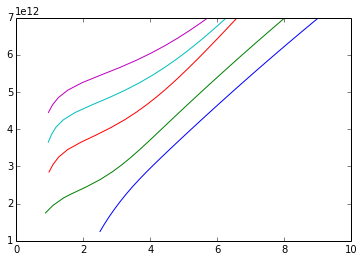

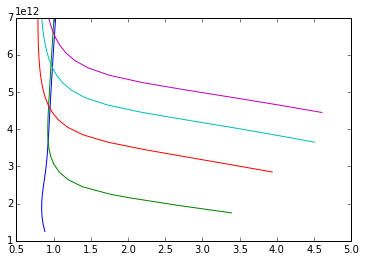

In [9]:
%reload_ext autoreload
%autoreload
%pylab inline

for i in range(5):
    freq_sweep[i].RemoveNones()

for i in range(5):
    plot(np.real(np.array(freq_sweep[i].Y)), np.array(freq_sweep[i].X))
show()

for i in range(5):
    plot(-np.imag(np.array(freq_sweep[i].Y)), np.array(freq_sweep[i].X))
show()    